# Forzado armónico de un sistema de un único grado de libertad

![Departamento de Física, Facultad de Ciencias Exactas y Naturales, Universidad de Buenos Aires](figuras/logoDF.png "DF, FCEyN, UBA")  
©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

----

## Sistema forzado
![](figuras/shabana_fig_1_11.png)  
La dinámica del sistema de la figura estará determinada por  
- m : masa
- k : rigidez (_stiffness_) de un resorte que proveé una fuerza elástica según el modelo de Hooke, $\vec{F}_\mathrm{elástica} = - k x \hat{x}$
- c : coeficiente de la fuerza de amortiguación modelizada lineal con la velocidad, provista por un amortiguador en cuyo interior un pistón está sumergido en un fluido viscoso como el aceite, $\vec{F}_\mathrm{amortiguación} = - c \dot{x} \hat{x}$
- F(t) : un fuerza externa arbitaria en el tiempo que eventualmente lo saque del equilibrio. 

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
t = sym.symbols('t') # tiempo
m, k, c = sym.symbols('m, k, c', positive = True)
x, F = mech.dynamicsymbols('x F')

Para una amortiguación proporcional con la velocidad la dinámica la describe

In [3]:
x_Dinámica = sym.Eq(m* x.diff(t,2) + c* x.diff(t) + k* x , F)
x_Dinámica

que en ingeniería suele escibirse normalizando por la masa

In [4]:
x_Dinámica_masa = sym.Eq( (x_Dinámica.lhs/ m).expand(), x_Dinámica.rhs/ m)
x_Dinámica_masa

In [5]:
omega, Gamma = sym.symbols('omega, Gamma', real=True)
x_Dinámica_omegaGamma = x_Dinámica_masa.subs([(k/m, omega**2), (c/m, Gamma) ]).simplify()
x_Dinámica_omegaGamma

## Forzado armónico
Vimos que cuando $F = 0$ el movimiento se extingue más o menos rápido en función del $c$ de amortiguación, pero finalmente lo hace.
En presencia de $F(t)$ igualmente la contribución de la solución de la ecuación homogénea se vá extinguiendo durante un inicial **transitorio**.
Pasado este domina la dinámica una solución particular en función de $F(t)$ que impone un **estado estacionario** de oscilación.

Se estudiará primero la respuesta el sistema con una fuerza armónica

In [6]:
F_0, omega_f = sym.symbols('F_0 omega_f', positive = True)
F_armonica = F_0* sym.sin(omega_f* t)
sym.Eq(F, F_armonica)

La ecuación diferencial a resolver es 

In [7]:
x_forzadoArmónico = x_Dinámica_omegaGamma.expand().subs(F, F_armonica)
x_forzadoArmónico

Sabemos que substituyendo la solución particular que responde a tal forzado $x_p = A_1 \cos{\omega_f t} + A_2 \sin{\omega_f t}$ en la ecuación permite obtener los $A_i$.
Pero `sympy` puede encargarse de todo el proceso y darnos $x = x_h + x_p$ directamente. 

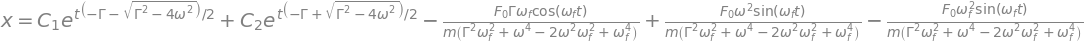

In [8]:
x_forzadoArmónico_sol = sym.dsolve(x_forzadoArmónico)
x_forzadoArmónico_sol

Los términos que dependen de $C_i$ son los de la solución homogénea que es significativa durante un **transitorio** que se considera extinto para $t> 10 \tau= 20 \Gamma^{-1}$ (10 **períodos de relajación**).
Para tiempos posteriores la solución alcanza el **estado estacionario** dado por los términos que dependen del forzado.

Se establece $C_1 = C_2 = 0$ para obtener solo $x_p(t)$.

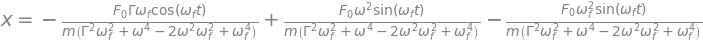

In [9]:
x_particular = x_forzadoArmónico_sol.subs([('C1', 0), ('C2', 0)])
x_particular

Algo notorio es que $\Gamma$ no figura en $x_p$, es decir el régimen de amortiguamiento no afecta la dinámica pasado el transitorio.

Si se simplifica la solución particular

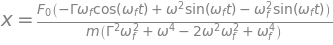

In [10]:
x_particular = x_particular.simplify()
x_particular

se vé que será el denominador común el que determine la amplitud del movimiento, pues los términos del numerador aparecen acotados por funciones armónicas.

Para ver donde se maximiza la amplitud del movimiento en función de $\omega_f$ sería interesante aislar este denominador y generar un gráfico de la fracción $ \frac{1}{\text{denominador}}$. `Sympy` tiene la función `args` que "desmenuza" en sus partes cualquier expresión

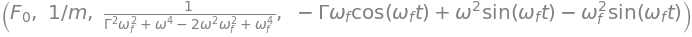

In [11]:
x_particular.rhs.args

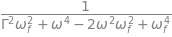

In [12]:
x_particular.rhs.args[2]

Antes de graficar tal función vs. $\omega_f$ se asigna una magnitud a $\omega$ con los parámetros del sistema.

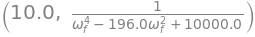

In [13]:
k_magnitud = 100 # [N m-1]
m_magnitud = 1 # [kg]
Gamma_magnitud = omega/5 # [s-1]

parámetros ={
    omega : sym.sqrt(k_magnitud/m_magnitud),
    m : m_magnitud,
    Gamma : Gamma_magnitud,
}

función_parámetros = x_particular.rhs.args[2].subs(parámetros)
parámetros[omega], función_parámetros

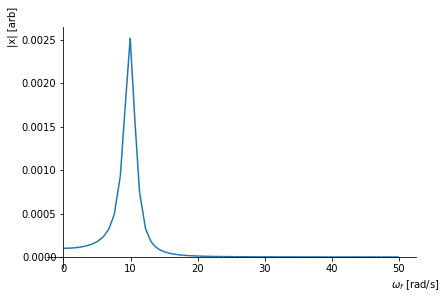

In [14]:
sym.plot(función_parámetros, (omega_f,0, 50), ylabel='|x| [arb]', xlabel=r'$\omega_f$ [rad/s]') 

Sin muchas sorpresa verificamos que la amplitud de oscilación en el estado estacionario tiene un máximo cuando la frecuencia del forzado armónico $\omega_f$ coincide con la frecuencia de oscilación natural del sistema $\omega$ **independientemente de su amortiguamiento**. Esto se llama **resonancia** y es algo que se evita si se busca una relativa estabilidad del sistema.

¿Porque sucede esto para $\omega_f = \omega$?
Para responder esto hay que estudiar la **transferencia de energía** entre el sistema y su forzamiento.